In [1]:
import ffn
%matplotlib inline
import numpy as np
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime
import pickle
import talib
from talib import MA_Type
import requests

In [2]:
# 讀出預先下載好的股價資料
with open('stockdata', 'rb') as f:
    data = pickle.load(file=f)

# Q1. 畫出 Diamond Shape, 把三角形改成菱形

In [3]:
def pyramid(n):
    for i in range(1,n+1):
        s=" "*(n-i)+"*"*(2*i-1)
        print(s)

    for i in range(1,n):
        s=" "*(i)+"*"*(2*(n-i)-1)
        print(s)
pyramid(8)

       *
      ***
     *****
    *******
   *********
  ***********
 *************
***************
 *************
  ***********
   *********
    *******
     *****
      ***
       *


# Q2. 刪除重複性資料

從 symbols01.txt 跟 symbols02.txt 讀入兩組股票代號，合併兩組代號，輸出一份無重複的股票代號到 symbols03.txt。
(提示：文字檔讀寫 + list + set)

In [4]:
# 讀取symbols01.txt & symbols02.txt檔案：
with open('symbols01.txt','r') as f:
    symbols01=f.read()
    symbols01=symbols01.strip().split("\n")
    a=set(symbols01)
    print(a)

{'FAB', 'REPH', 'HMNY', 'PCYO', 'NSTG', 'PEBK', 'DZSI', 'HLG', 'OPHT', 'FAD', 'USAK', 'PTF', 'ASNS', 'CPIX', 'KMDA', 'CALL', 'USLB', 'TESO', 'MIII', 'PBIP', 'LARK', 'DAIO', 'SRNE', 'GAIA', 'IFMK', 'IDSY', 'LAKE', 'ZYNE', 'WLFC', 'CTSO', 'PXLW', 'FNY', 'GEC', 'KTEC', 'ESGD', 'KWEB', 'PCTI', 'VCEL', 'TRCB', 'CDOR', 'METC', 'ZLAB', 'DWCH', 'HWCC', 'KBLM', 'HBIO', 'MDWD', 'AMRS', 'SITO', 'IGLD', 'ESCA', 'PLBC', 'SRRA', 'ASYS', 'HYGS', 'KRYS', 'SQBG', 'TRIB', 'EXXI', 'ESQ', 'CGEN', 'NHTC', 'ONVO', 'KBWR', 'ROBO', 'DWFI', 'MFNC', 'GASS', 'TUES', 'WKHS', 'GECC', 'OTIC', 'CDNA', 'DWIN', 'IOTS', 'LYTS', 'RIOT', 'SBCP', 'UBFO', 'PNTR', 'ELEC', 'ALJJ', 'ESSA', 'IRMD', 'JMBA', 'QTRH', 'NSSC', 'PFSW', 'RARX', 'GLDI', 'ALSK', 'ARQL', 'LQDT', 'VEAC', 'SYNL', 'FONR', 'TCBIP', 'FSFG', 'MBCN', 'CELC', 'SLCT', 'PROV', 'CKPT', 'CLSD', 'DRRX', 'III', 'SAL', 'HNNA', 'OMED', 'ASPU', 'GPAC', 'PRN', 'BRQS', 'PANL', 'ADRE', 'PHIIK', 'VRML', 'FNHC', 'PCOM', 'RNWK', 'VSTM', 'RBPAA', 'ACFC', 'ESES', 'OFS', 'SSTI',

In [5]:
# 讀取symbols02.txt檔案：
with open('symbols02.txt','r') as f:
    symbols02=f.read()
    symbols02=symbols02.strip().split("\n")
    b=set(symbols02)
    print(b)

{'AGFS', 'REPH', 'NSTG', 'CLNT', 'SRAX', 'DZSI', 'CYCCP', 'LACQU', 'OBAS', 'PSEC', 'DGII', 'NICK', 'CTG', 'PLAB', 'GPRO', 'CBAY', 'KAACU', 'SGMA', 'FRTA', 'GEMP', 'KIN', 'ATAC', 'PDEX', 'ARDX', 'NTRP', 'IOVA', 'VIAV', 'TOUR', 'HYGS', 'PGNX', 'ADRO', 'NCMI', 'FOSL', 'CDNA', 'TGTX', 'FAT', 'IIJI', 'ITI', 'SRUN', 'MRAM', 'WRLS', 'LQDT', 'EDGW', 'FNKO', 'NLNK', 'VRA', 'AMD', 'MTEM', 'ACFC', 'HQCL', 'TRPX', 'NESR', 'RMTI', 'LCA', 'CCXI', 'KNDI', 'ATAX', 'RBBN', 'FENC', 'WVVIP', 'OCSI', 'WATT', 'WYIG', 'CAMT', 'IVAC', 'VNET', 'CRBP', 'KVHI', 'LPTX', 'CNFR', 'GRPN', 'DOTA', 'PIH', 'TRVG', 'DAKT', 'AXTI', 'SOHO', 'PETX', 'ARCT', 'NTEC', 'OBSV', 'APOP', 'MGEN', 'VCEL', 'SIRI', 'HDSN', 'FTR', 'BRAC', 'CDXS', 'VOXX', 'DCIX', 'ELGX', 'FSAC', 'FRED', 'CDTX', 'AMBCW', 'SSRM', 'MCRB', 'SIGM', 'MPAC', 'MITK', 'GSUM', 'SPIL', 'PPHM', 'ALDX', 'AIRG', 'KALV', 'MITL', 'OSPRU', 'ATTU', 'ACMR', 'INDU', 'ESXB', 'AXON', 'CDXC', 'CLAR', 'MGIC', 'MNTX', 'CRWS', 'IKNX', 'FOMX', 'MCBC', 'MTFB', 'CPIX', 'KTCC', 'C

In [8]:
# 聯集
c = (a | b)

#轉成 list容器型態
symbols03 = list(c)
print(symbols03)

['CBIO', 'PYZ', 'MNTX', 'GLDI', 'SSRM', 'MGIC', 'KAACU', 'OCLR', 'OVBC', 'CECE', 'SSFN', 'HDSN', 'ELECU', 'NHTC', 'QNST', 'TVIX', 'OFED', 'RMNI', 'NDLS', 'PIH', 'SBBP', 'PPSI', 'ZKIN', 'CSSE', 'CTIC', 'AKTX', 'TCRD', 'IKNX', 'FEIM', 'JYNT', 'ALJJ', 'CLFD', 'IVTY', 'TBBK', 'WCFB', 'LPTX', 'ENDP', 'RBCN', 'GLMD', 'GLDD', 'BDSI', 'PGNX', 'AINV', 'HMNY', 'VRAY', 'SORL', 'IFMK', 'CYRN', 'RGCO', 'PTNR', 'RCMT', 'NTRP', 'WKHS', 'CTSO', 'SOHO', 'VDTH', 'CODA', 'CRNT', 'CBAN', 'ABDC', 'IEUS', 'ELEC', 'OCUL', 'BANX', 'FSAC', 'ADMA', 'OPHT', 'BEBE', 'EIGI', 'TRPX', 'PNRG', 'CDTX', 'AGRX', 'LOAN', 'ZN', 'ESQ', 'FNKO', 'ATAC', 'RELL', 'LTRPA', 'SVA', 'AMRS', 'LAKE', 'HWCC', 'RRD', 'OMED', 'SND', 'PETX', 'IOVA', 'TCBIP', 'PHIIK', 'ABCD', 'ADRE', 'ASV', 'DTEA', 'DXGE', 'FRBK', 'GWGH', 'SELB', 'BRPA', 'PETZ', 'HBIO', 'HNNA', 'VSTM', 'FAT', 'SVVC', 'SCAC', 'SBCP', 'TA', 'BCAC', 'MBFIP', 'EKSO', 'ENFC', 'FIXD', 'CLRO', 'KBLM', 'MVIS', 'ITI', 'OBLN', 'ATAX', 'IAM', 'TTOO', 'IRMD', 'KCAP', 'PLBC', 'DWCH',

In [9]:
#將 symbols03寫入成文字檔
with open('symbols03.txt','w') as f:
    for symbol in symbols03:
        f.write(symbol.strip().upper()+"\n")

# Q3. 下載台灣上市公司基本資料
         (提示：requests + read_csv or csvreader)。

寫一個程式從 [http://dts.twse.com.tw/opendata/t187ap03_L.csv](http://dts.twse.com.tw/opendata/t187ap03_L.csv) 下載台灣上市公司基本資料，並輸出成 pandas dataframe。

In [10]:
import requests

In [11]:
r = requests.get("http://dts.twse.com.tw/opendata/t187ap03_L.csv")

In [28]:
r.encoding = "big5"
r.text

'106年12月07日17:30:01公司基本資料,\r\n"公司代號","公司名稱","產業別","住址","營利事業統一編號","董事長","總經理","發言人","發言人職稱","代理發言人",總機電話","成立日期","上市日期","普通股每股面額","實收資本額","私募股數","特別股","編制財務報表類型","股票過戶機構","過戶電話","過戶地址","英文簡稱","英文通訊地址","傳真機號碼","電子郵件信箱","網址" \r\n"1101","台灣水泥股份有限公司","水泥工業","台北市中山北路2段113號","11913502","張安平","李鐘培","黃健強","資深副總經理","蔡立文","(02)2531-7099","19501229","19620209","新台幣                 10.0000元","42465090100","0","0","1","中國信託商業銀行代理部","66365566","台北市重慶南路一段83號5樓","TCC","No.113, Sec.2, Zhongshan N. Rd.,Taipei City 104,Taiwan (R.O.C.)","(02)2531-6529","finance@taiwancement.com","http://www.taiwancement.com",\r\n"1102","亞洲水泥股份有限公司","水泥工業","台北市大安區敦化南路2段207號30、31樓","03244509","徐旭東","李坤炎","周維崑","副總經理","吳玲綾","02-2733-8000","19570321","19620608","新台幣                 10.0000元","33614471980","0","0","1","亞東證券股份有限公司","02-2361-8608","台北市重慶南路一段86號3樓","ACC","30TH FLOOR,TAIPEI METRO TOWER,207.TUN HWA SOUTH ROAD,SEC.2,TAIPEI,TAIWAN,R.O.C","02-2378-5191","service@acc.com.tw","www.acc.com.tw",\r\n"1103","嘉新水泥股份有限公司","水泥

In [30]:
from io import StringIO

data = StringIO(r.text)
pd.read_csv(data, skiprows=1)

,公司代號,公司名稱,產業別,住址,營利事業統一編號,董事長,總經理,發言人,發言人職稱,代理發言人,...,特別股,編制財務報表類型,股票過戶機構,過戶電話,過戶地址,英文簡稱,英文通訊地址,傳真機號碼,電子郵件信箱,網址
1101,台灣水泥股份有限公司,水泥工業,台北市中山北路2段113號,11913502.0,張安平,李鐘培,黃健強,資深副總經理,蔡立文,(02)2531-7099,...,1.0,中國信託商業銀行代理部,66365566,台北市重慶南路一段83號5樓,TCC,"No.113, Sec.2, Zhongshan N. Rd.,Taipei City 10...",(02)2531-6529,finance@taiwancement.com,http://www.taiwancement.com,NaN
1102,亞洲水泥股份有限公司,水泥工業,台北市大安區敦化南路2段207號30、31樓,3244509.0,徐旭東,李坤炎,周維崑,副總經理,吳玲綾,02-2733-8000,...,1.0,亞東證券股份有限公司,02-2361-8608,台北市重慶南路一段86號3樓,ACC,"30TH FLOOR,TAIPEI METRO TOWER,207.TUN HWA SOUT...",02-2378-5191,service@acc.com.tw,www.acc.com.tw,NaN
1103,嘉新水泥股份有限公司,水泥工業,台北市中山北路2段96號,11892801.0,張剛綸,祁士鉅,王立心,執行副總經理,余曉芸,(02)2551-5211,...,1.0,群益金鼎證券股份有限公司股代部,(02)2702-3999,台北市敦化南路2段97號地下2樓,CHC,"No.96, Sec. 2, Zhongshan N. Rd., Zhongshan Dis...",(02)2511-4002,investor-relations@chcgroup.com.tw,www.chcgroup.com.tw,NaN
1104,環球水泥股份有限公司,水泥工業,台北市南京東路二段125號10樓,7568009.0,侯博義,侯博義,楊宗仁,經理,詹志鴻,02-25077801,...,1.0,凱基證券股份有限公司股務代理部,02-23892999,﹝100﹞台北市重慶南路一段2號5樓,UCC,"10th F1., 125 Nanking E.Rd Sec. 2,Taipei Taiwan",02-25075870,ucc@ucctw.com,www.ucctw.com,NaN
1108,幸福水泥股份有限公司,水泥工業,台北市松江路237號15樓,40601248.0,陳兩傳,陳兩傳,溫秀菊,財務部經理,陳一誠,25092188,...,1.0,永豐金證券股務代理,2381-6288,台北市中正區博愛路17號3樓,LUCKY CEMENT,"15TH FL.,NO.237,SUNG KIANG RD.,TAIPEI,TAIWAN,R...",25048672,"wendy@luckygrp,com.tw",www.luckygrp.com.tw,NaN
1109,信大水泥股份有限公司,水泥工業,台北市寶慶路37號7樓,3279507.0,楊智雄,楊智雄,吳連富,副總經理,林坤榮,(02)23816731,...,1.0,中國信託商業銀行代理部,(02)6636-5566,台北巿重慶南路一段83號5樓,HsingTa,"7TH FL.,No.37 Pao Ching RoadTaipei Taiwan R.O.C.",23314086,service@hsingta.com.tw,www.hsingta.com.tw,NaN
1110,東南水泥股份有限公司,水泥工業,高雄市前金區五福三路21號4樓之1,83078600.0,陳敏斷,吳長直,黃薪翰,財務部經理,唐榮宗,07-2711121,...,1.0,元大證券股份有限公司,02-25865859,台北市承德路三段210號地下室1樓,TUNA CEMENT,"NO.21 Wu Fu 3 RoadKaohsiung, Taiwan, R.O.C.",07-9505895,southeast@secement.com,www.southeastcement.com.tw,NaN
1201,味全食品工業股份有限公司,食品工業,台北市松江路125號,11347802.0,陳永清,蘇守斌,張美凰,財務長,─,(02)25065020,...,1.0,元大證券股務代理部,(02)25865859,台北市大同區承德路3段210號地下一樓,Wei Chuan,"10F., No.125, Sung Chiang Rd.Taipei, Taiwan(R....",(02)25063182,service@weichuan.com.tw,http://www.weichuan.com.tw,NaN
1203,味王股份有限公司,食品工業,台北市中山北路二段79號5樓,7067309.0,陳清福,陳恭平,魏璟雄,經理,李兆弘,(02)25717271,...,1.0,群益金鼎證券股份有限公司,27023999,台北市敦化南路二段97號地下2樓,VE WONG,"5TH FL., 79 CHUNG SHAN N. RD., SEC.2TAIPEI TAIWAN",(02)25811006,wei@vewong.com.tw,http://www.vewong.com,NaN
1210,大成長城企業股份有限公司,食品工業,台南市永康區蔦松二街三號,73008303.0,韓家宇,莊坤炎,周叔恆,特助,常岡德,06-2531111,...,1.0,中國信託商業銀行代理部,02-66365566,台北市重慶南路一段八十三號六樓,GREATWALL,3 NIAOSUN 2TH STREETYONGKONG TAINAN CONTY TAIWAN,06-2534596,john@greatwall-group.com,http://www.dachan.com,NaN


# Q4. 畫出技術曲線

請畫出除了上課提過的線型之外的任何技術曲線，並寫註解說明。 (提示： matplotlib + TA-Lib 或 pandas rolling)。

In [6]:
data.keys()

dict_keys(['TICC', 'TWIN', 'AMOT', 'CDZI', 'GOOG', 'TBNK', 'RICK', 'UTMD', 'YTRA', 'CSML', 'NLNK', 'BLCM', 'CZNC', 'GERN', 'CDXS', 'TTPH', 'SCAC', 'HBCP', 'LCA', 'BBGI', 'TCRD', 'TSLA', 'ISRL', 'BELFB', 'PSC', 'NKSH', 'VRA', 'NEWT', 'AAPL', 'DFRG'])

In [7]:
df = data['TSLA']

In [8]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-12-31,238.509995,243.449997,238.369995,240.009995,240.009995,2715000
2016-01-04,230.720001,231.380005,219.000000,223.410004,223.410004,6827100
2016-01-05,226.360001,226.889999,220.000000,223.429993,223.429993,3186800
2016-01-06,220.000000,220.050003,215.979996,219.039993,219.039993,3779100
2016-01-07,214.190002,218.440002,213.669998,215.649994,215.649994,3554300


In [9]:
# 逆勢策略-Bollinger Band
# 中軌 = 月簡單移動平均線 = MA20
# 上軌 = 中軌 + 2 *（標準差）
# 下軌 = 中軌 − 2 *（標準差）
# 若資料呈現常態分佈，那在兩倍標準差之內的值約有95%，因此，在兩倍標準差之外的值不是過高就是過低，之後回到區間的機會很大。

df['MA20'] = pd.Series.rolling(df['Close'], window=20).mean()
df['STD'] = pd.Series.rolling(df['Close'], window=20).std()

#bbands策略,MA20=月均線
df['UPB'] = df['MA20']+2*df['STD']
df['LOWB'] = df['MA20']-2*df['STD']

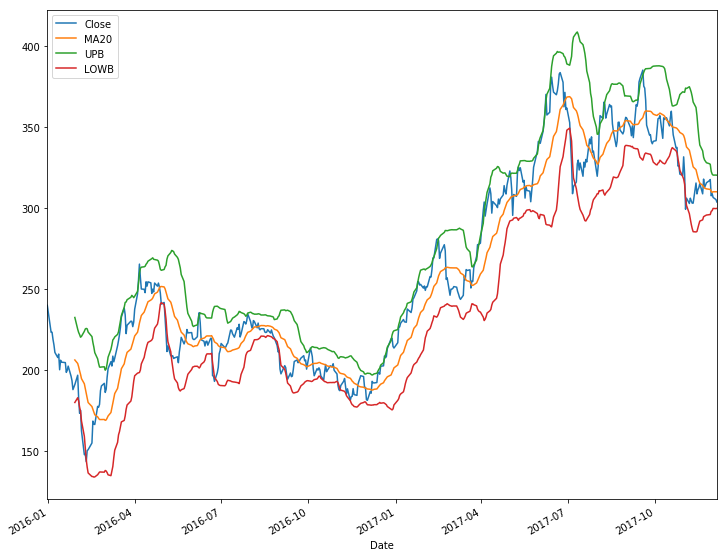

In [10]:
# 畫出收盤價 & 月均線 & 上軌 & 下軌的技術曲線
df[['Close', 'MA20', 'UPB','LOWB']].plot(legend='best', figsize=(12,10))

In [11]:
# 做黃金交叉 & 死亡交叉線
df['MA5'] = pd.Series.rolling(df['Close'], window=5).mean()
df['MA10'] = pd.Series.rolling(df['Close'], window=10).mean()
df['MA30'] = pd.Series.rolling(df['Close'], window=30).mean()

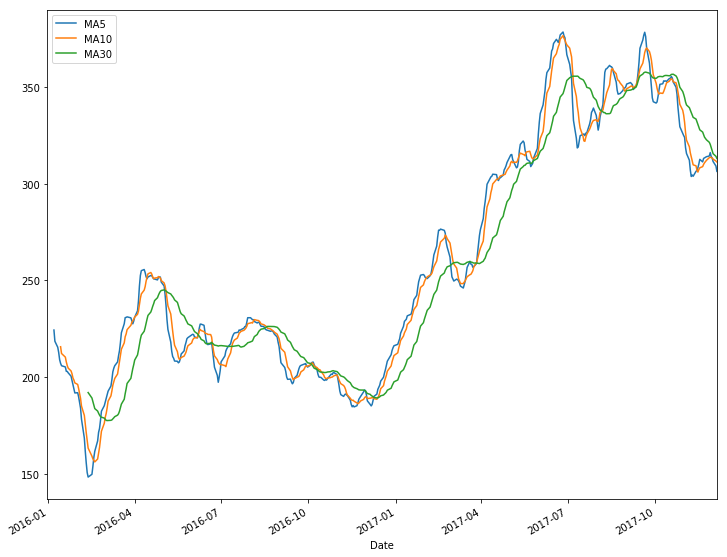

In [12]:
df[['MA5', 'MA10', 'MA30']].plot(legend='best', figsize=(12,10))

# Q5. 策略回測
        (提示：簡單的 pandas 使用)。

In [13]:
# 計算 MaxDD
def DrawDownAnalysis(cumRet):
    dd_series = ffn.core.to_drawdown_series(cumRet)
    dd_details = ffn.core.drawdown_details(dd_series)
    return dd_details['drawdown'].min(), dd_details['days'].max()

In [14]:
# 利用策略產生的持有部位資訊，計算底下四個指標來判斷投資績效
# sharpe ratio: 判斷報酬的好壞跟穩定度，數值越大越好
# maxdd: maximum drawdown, 最糟糕的狀況會賠幾 %
# maxddd: maximum drawdown duration, 低於上一次最高報酬的天數
# cumRet[-1]: 最後賺的 % 數

def indicators(df):
    dailyRet = df['Close'].pct_change()
    excessRet = (dailyRet - 0.04/252)[df['positions'] == 1]
    SharpeRatio = np.sqrt(252.0)*np.mean(excessRet)/np.std(excessRet)
    
    cumRet = np.cumprod(1+excessRet)
    
    maxdd, maxddd = DrawDownAnalysis(cumRet)
    
    return SharpeRatio, maxdd, maxddd, cumRet[-1]

In [15]:
# 這是我們的策略的部分
# 主要只是要算出進出的訊號 signals 跟何時持有部位 positions
# 底下是一個突破系統的範例

def Breakout_strategy(df):
    # Donchian Channel
    df['20d_high'] = np.round(pd.Series.rolling(df['Close'], window=20).max(), 2)
    df['10d_low'] = np.round(pd.Series.rolling(df['Close'], window=10).min(), 2)

    has_position = False
    df['signals'] = 0
    for t in range(2, df['signals'].size):
        if df['Close'][t] > df['20d_high'][t-1]:
            if not has_position:
                df.loc[df.index[t], 'signals'] = 1
                has_position = True
        elif df['Close'][t] < df['10d_low'][t-1]:
            if has_position:
                df.loc[df.index[t], 'signals'] = -1
                has_position = False

    df['positions'] = df['signals'].cumsum().shift()
    return df

In [16]:
def RSI_7030_strategy(df):
    df['RSI'] = talib.RSI(df['Close'].values)
    
    has_position = False
    df['signals'] = 0
    for t in range(2, df['signals'].size):
        if df['RSI'][t-1] < 30:
            if not has_position:
                df.loc[df.index[t], 'signals'] = 1
                has_position = True
        elif df['RSI'][t-1] > 70:
            if has_position:
                df.loc[df.index[t], 'signals'] = -1
                has_position = False

    df['positions'] = df['signals'].cumsum().shift()
    return df

In [17]:
def BBands_strategy(df):
    df['UBB'], df['MBB'], df['LBB'] = talib.BBANDS(df['Close'].values, matype=MA_Type.T3)

    has_position = False
    df['signals'] = 0
    for t in range(2, df['signals'].size):
        if df['Close'][t] < df['LBB'][t-1]:
            if not has_position:
                df.loc[df.index[t], 'signals'] = 1 #買進的訊號
                has_position = True
        elif df['Close'][t] > df['UBB'][t-1]:
            if has_position:
                df.loc[df.index[t], 'signals'] = -1 #賣出的訊號
                has_position = False

    df['positions'] = df['signals'].cumsum().shift()  #累加買進的訊號，直到碰到買出的訊號後全數賣出
    return df

In [11]:
# 定義你的策略

def N054030017_strategy(df):
    has_position = False
    df['signals'] = 0
    
    # TODO
    # 當短周期均線(MA20)由下方突破長周期均線(MA60),即為[黃金交叉],買進
    # 反之;當短周期均線(MA20)由下方跌破長周期均線(MA60),即為[死亡交叉],賣出
    
    
    
    

    df['positions'] = df['signals'].cumsum().shift()
    return df

In [12]:
def apply_strategy(strategy, df):
    return strategy(df)

In [13]:
# 計算各支股票的回測結果
results = []

#strategies = [Breakout_strategy, RSI_7030_strategy, BBands_strategy, N054030017_strategy]
strategies = [Breakout_strategy, RSI_7030_strategy, BBands_strategy]

for symbol in data:
    for strategy in strategies:
        try:
            apply_strategy(strategy, data[symbol])
            if np.all(data[symbol]['signals']==0):
                print("Symbol:", symbol, "使用", strategy.__name__, "策略沒有出現買賣訊號。")
                continue
            SharpeRatio, maxdd, maxddd, finalRet = indicators(data[symbol])
            days = (data[symbol].index[-1] - data[symbol].index[0]).days
            results.append((SharpeRatio, maxdd, maxddd, finalRet, days,
                            data[symbol][data[symbol]['signals'] > 0]['signals'].sum(), symbol, strategy.__name__))
        except Exception as e:
            print("Error occurs at symbol:", symbol, "Strategy:", strategy.__name__, "==>", e.args)

In [14]:
results_df = pd.DataFrame(results, columns=['sharpe','MaxDrawDown','MaxDrawDownDuration','returns', 
                                            'days', 'entries','symbol','strategy'])

In [15]:
results_df.head()

,sharpe,MaxDrawDown,MaxDrawDownDuration,returns,days,entries,symbol,strategy
0,0.131503,-0.208296,281,0.995734,705,11,TICC,Breakout_strategy
1,0.395515,-0.244817,482,1.077756,705,2,TICC,RSI_7030_strategy
2,0.102787,-0.231763,426,0.984521,705,20,TICC,BBands_strategy
3,1.365570,-0.361485,299,1.631388,705,12,TWIN,Breakout_strategy
4,2.424484,-0.169115,115,2.151881,705,3,TWIN,RSI_7030_strategy


In [16]:
results_df.sort_values('MaxDrawDown',ascending=False).head()

,sharpe,MaxDrawDown,MaxDrawDownDuration,returns,days,entries,symbol,strategy
55,6.306176,-0.003654,122,1.028222,473,3,LCA,RSI_7030_strategy
13,10.243474,-0.006251,3,1.132402,705,1,GOOG,RSI_7030_strategy
56,2.038551,-0.013673,119,1.060527,473,16,LCA,BBands_strategy
50,1.085572,-0.023454,135,1.049505,384,12,SCAC,BBands_strategy
27,3.040178,-0.023844,58,1.073352,203,3,CSML,Breakout_strategy


In [17]:
results_df.sort_values('returns',ascending=False).head()

,sharpe,MaxDrawDown,MaxDrawDownDuration,returns,days,entries,symbol,strategy
7,2.013777,-0.219296,167,2.477803,705,4,AMOT,RSI_7030_strategy
11,2.062962,-0.286661,113,2.422460,705,22,CDZI,BBands_strategy
59,2.136744,-0.454342,191,2.400221,705,21,BBGI,BBands_strategy
4,2.424484,-0.169115,115,2.151881,705,3,TWIN,RSI_7030_strategy
68,1.724711,-0.231083,481,1.717758,704,20,ISRL,BBands_strategy
